In [9]:
%run Scope.ipynb
from tqdm.notebook import trange
from tqdm import tnrange
import random

#dut_setup is used to setup the dut. for CW305 you can provide a bitfile as extra parameter
tar = dut_setup(board="CW305")#, bitfile ="D:/Riscure_Trace/Dillibabu/Ascon/cw305_top.bit")
sco = scope_setup(isshort=True)
# sco.reset()
traces = []
output=[]
plain_len=16
key= [43,126,21,22,40,174,210,166,171,247,21,136,9,207,79,60]
#plain_text = [50,67,246,168,136,90,48,141,49,49,152,162,224,55,7,52]

import pytrinamic
from pytrinamic.connections import ConnectionManager
#from pytrinamic.connections import ConnectionInterface
from pytrinamic.modules import TMCM6110
import time
# Connect to the Trinamic 6110 XYZ controller through the serial port
connectionManager = ConnectionManager()
interface = connectionManager.connect()

# Create an instance of the TMCM_6110 class
module = TMCM6110(interface)


motor_0 = module.motors[0]
motor_1 = module.motors[1]
motor_2 = module.motors[2]
print("Preparing parameters")
# preparing drive settings
motor_0.drive_settings.max_current = 500
motor_0.drive_settings.standby_current = 200
motor_0.drive_settings.boost_current = 0
motor_0.drive_settings.microstep_resolution = motor_0.ENUM.microstep_resolution_256_microsteps
print(motor_1.drive_settings)
motor_1.drive_settings.max_current = 500
motor_1.drive_settings.standby_current = 200
motor_1.drive_settings.boost_current = 0
motor_1.drive_settings.microstep_resolution = motor_1.ENUM.microstep_resolution_256_microsteps
print(motor_2.drive_settings)
motor_2.drive_settings.max_current = 500
motor_2.drive_settings.standby_current = 200
motor_2.drive_settings.boost_current = 0
motor_2.drive_settings.microstep_resolution = motor_2.ENUM.microstep_resolution_256_microsteps
print(motor_2.drive_settings)
# Set the current and maximum motor currents
#motor_0.set_max_current(500)  # 500mA
#motor_0.set_current(200)    # 200mA

# Set the motor to move at a maximum velocity of 1000 steps/s
#motor_0.set_max_velocity(1000)

# preparing linear ramp settings
motor_0.max_acceleration = 1500
motor_1.max_acceleration = 1500
motor_2.max_acceleration = 1500
motor_0.max_velocity = 1000
motor_1.max_velocity = 1000
motor_2.max_velocity = 1000


motor_0.actual_position = 0
motor_1.actual_position = 0
motor_2.actual_position = 0



# Define the dimensions of the scanning area
x_min = 0
x_max = 1
y_min = -10000
y_max = 20000
z_min = -10000
z_max = 30000

# Set the starting position of the motor to the bottom-left corner of the scanning area
motor_0.move_to(x_min)
motor_1.move_to(y_min)
motor_2.move_to(z_min)

# Start scanning the chip by incrementing the position of the motor in steps of 0.1mm
step_size = 10000  # Step size in microsteps
x = x_min
y = y_min
z = z_min

while x <= x_max:
    while y <= y_max:
        while z <= z_max:
            motor_0.move_by(x)
            motor_1.move_by(y)
            motor_2.move_by(z)
            i = motor_0.get_position_reached()
            j = motor_1.get_position_reached()
            k = motor_2.get_position_reached()
            #print("scan_at_ijk",i,j,k)
            #print("scan_at_xyz",x,y,z)
            
            #------------------------------
            plain_text = bytearray([random.getrandbits(8) for j in range (0,plain_len)])
            #trace,output = capture_cw305(sco,tar,plain_text = [50,67,246,168,136,90,48,141,49,49,152,162,224,55,7,52] ,key= [43,126,21,22,40,174,210,166,171,247,21,136,9,207,79,60])  
            trace,output = capture_cw305(sco,tar,plain_text =plain_text ,key= key)  
    
            while trace is None:
                trace,output = capture_cw305(sco,tar,plain_text = plain_text ,key= key) 
                    
                                                  
            print("Scan_at_xyz_[",x,y,z,"]", 'Ciphertext = ',list(output[::-1]) )
   
            traces.append(trace)
            
            #------------------------------
            
            time.sleep(.75)
            #module.wait_for_target_reached()
            # Do something here, like reading sensor data or taking a picture
            z += step_size
            #print("z value",z)
        y += step_size
        #print("y value",y)
        z = z_min
    x += step_size
    #print("x value",x)
    y = y_min

# Move the motor back to the home position
motor_0.move_to(0)
motor_1.move_to(0)
motor_2.move_to(0)


# Disconnect from the Trinamic 6110 XYZ controller
interface.close()
sco.close()
tar.dis()


isshort
Preparing parameters
DriveSettings {'max_current': 244, 'standby_current': 200, 'boost_current': 0, 'microstep_resolution': 8, 'reference_switch_tolerance': 0}
DriveSettings {'max_current': 244, 'standby_current': 200, 'boost_current': 0, 'microstep_resolution': 8, 'reference_switch_tolerance': 0}
DriveSettings {'max_current': 244, 'standby_current': 200, 'boost_current': 0, 'microstep_resolution': 8, 'reference_switch_tolerance': 0}
Scan_at_xyz_[ 0 -10000 -10000 ] Ciphertext =  [179, 180, 97, 164, 159, 230, 11, 100, 210, 213, 187, 165, 118, 215, 147, 9]
Scan_at_xyz_[ 0 -10000 0 ] Ciphertext =  [159, 119, 193, 121, 180, 68, 220, 226, 84, 14, 84, 204, 170, 114, 221, 184]
Scan_at_xyz_[ 0 -10000 10000 ] Ciphertext =  [232, 124, 234, 127, 42, 40, 162, 78, 225, 189, 165, 67, 14, 12, 54, 250]
Scan_at_xyz_[ 0 -10000 20000 ] Ciphertext =  [155, 69, 191, 103, 140, 51, 144, 56, 83, 94, 47, 21, 154, 172, 49, 38]
Scan_at_xyz_[ 0 -10000 30000 ] Ciphertext =  [151, 100, 36, 155, 233, 20, 219

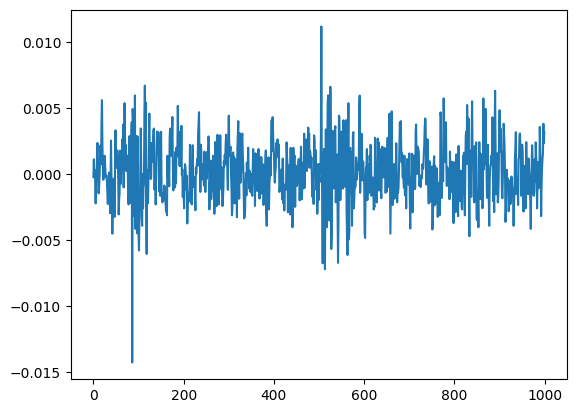

In [10]:
import matplotlib.pyplot as plt
plt.plot(traces[19])
plt.show()


In [ ]:
len(traces)